In [1]:
import sys
sys.path.append("..")
from utils.interpretation_generators import smoothgrad, simple_gradient
from utils.lenet import LeNet
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# makes default tensor a CUDA tensor so GPU can be used
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device(2 if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

In [2]:
net = LeNet(activation=torch.nn.functional.relu)
net_proxy = LeNet(activation=torch.nn.functional.softplus)

training_round = 2
net_name = f'../models/training_round_{training_round}/ep{0}_wd{0}_jr{0}_{training_round}'

net.load_state_dict(torch.load(net_name))
net_proxy.load_state_dict(torch.load(net_name))

# put each model in evaluation mode. i.e. turn off dropout layers, etc.
net.eval()
net_proxy.eval()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc1_drop): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc2_drop): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [3]:
data_preprocess = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(), 
                torchvision.transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
                datasets.MNIST(root='../data', train=True, transform=data_preprocess), 
                batch_size=1, shuffle=True)

net(sample) = 5


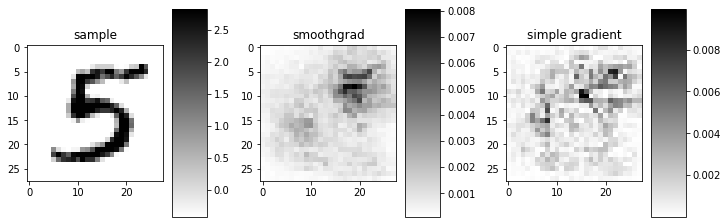

In [4]:
sample,label = next(iter(train_loader))
sample,label = sample.to(device),label.to(device)

s1 = smoothgrad(net, sample, label, j=15, scale=1.)
s2 = simple_gradient(net, sample, label)

fig = plt.figure(figsize=(10,3), constrained_layout=True)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

print(f'net(sample) = {torch.argmax(net(sample))}')

ax1 = fig.add_subplot(spec[0,0])
ax1.title.set_text('sample')
plt.imshow(sample.squeeze().cpu().numpy(), cmap='binary')
plt.colorbar()

ax2 = fig.add_subplot(spec[0,1])
ax2.title.set_text('smoothgrad')
plt.imshow(s1.cpu().detach().numpy(), cmap='binary')
plt.colorbar()

ax3 = fig.add_subplot(spec[0,2])
ax3.title.set_text('simple gradient')
plt.imshow(s2.cpu().detach().numpy(), cmap='binary')
plt.colorbar()

plt.show()